In [2]:
import sys
sys.path.append('../')
from graph_max_shift import *
import matplotlib.pyplot as plt
import pickle

In [3]:
# for plotting
from matplotlib.colors import ListedColormap
# colors = ["tab:gray",  "#ED5564", "#4FC1E8", "#FFCE54", "#A0D568", "#AC92EB"]

colors = ["tab:gray",  "#ED5564", "#4FC1E8", "#FFCE54", "#A0D568", "#AC92EB", "tab:pink",
         '#f8bbc1', '#b9e6f6', '#ffebbb', '#d9eec3', '#ded3f7', '#f4c9e7', "tab:purple",
          "darkturquoise", "slateblue", "tab:orange", "steelblue", "sandybrown", "peru",
          "aliceblue",'wheat', 'lightsteelblue'
          
          
         
         ]
cmap = ListedColormap(colors)
plt.rc('font',  size = 14)
boundaries = [np.array([[0,-1],[0,1]])]

Here we construct a distribution where the hop paramter is necessary to obtain an accurate clustering.

In [4]:
n = 10000

mu= .07
weights = [1/2, 1/2]
means = [np.array([-mu,0]), np.array([mu,0])]
covs = [np.array(([1/1000,0],[0,1/10])) for i in range(2)]

bimodal = GaussianMixture(weights, means, covs)
modes = find_modes(bimodal)

In [5]:
with open('data/elongated_gaussian.pkl', 'rb') as file:
    data = pickle.load(file)

In [6]:
# data = bimodal.sample(n)
graph = GeometricGraph(data, .1, batch_size=10000)
maxshift = GraphMaxShift(graph)

# with open('data/elongated_gaussian.pkl', 'wb') as file: # save raw data, clusters, parameters used, and ground truth 
#     pickle.dump(data, file)

100%|██████████| 2/2 [00:01<00:00,  1.68it/s]


In [7]:
theta = np.arange(0,2*np.pi, .01)

100%|██████████| 10000/10000 [00:01<00:00, 6102.44it/s]


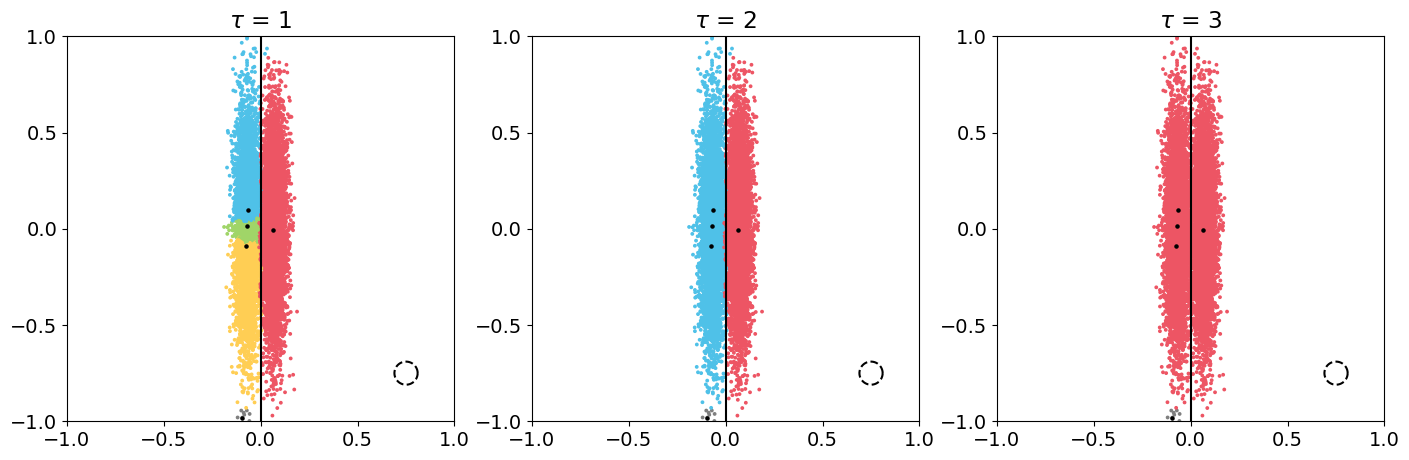

In [9]:
fig, axs = plt.subplots(1,3,figsize = [17,5])

r = .06
maxshift.cluster(r,m=1)
clusters = maxshift.reindex_clusters(25)
axs[0].scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin = 0, vmax = 23)
axs[0].set_title( r'$\tau$ = 1')

r = .06
maxshift.cluster(r,m=2)
clusters = maxshift.reindex_clusters(25)
axs[1].scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin = 0, vmax = 23)
axs[1].set_title( r'$\tau$ = 2')

r = .06
maxshift.cluster(r,m=3)
clusters = maxshift.reindex_clusters(25)
axs[2].scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin = 0, vmax = 23)
axs[2].set_title( r'$\tau$ = 3')

for i in range(3):
    axs[i].set_xlim(-1,1)
    axs[i].set_ylim(-1,1)
    axs[i].set_yticks(np.arange(-1,1.5,.5))
    for path in boundaries :
        axs[i].plot(path[:,0], path[:,1], color = 'black')
    axs[i].scatter(data[maxshift.modes,0], data[maxshift.modes,1], s =5, color = 'black')
    axs[i].plot(.75+r*np.cos(theta), -.75+r*np.sin(theta), color = 'black', linestyle = 'dashed')

    
plt.savefig('plots/hop_tuning.png', format='png', dpi=300, bbox_inches='tight')

100%|██████████| 10000/10000 [00:02<00:00, 4498.97it/s]


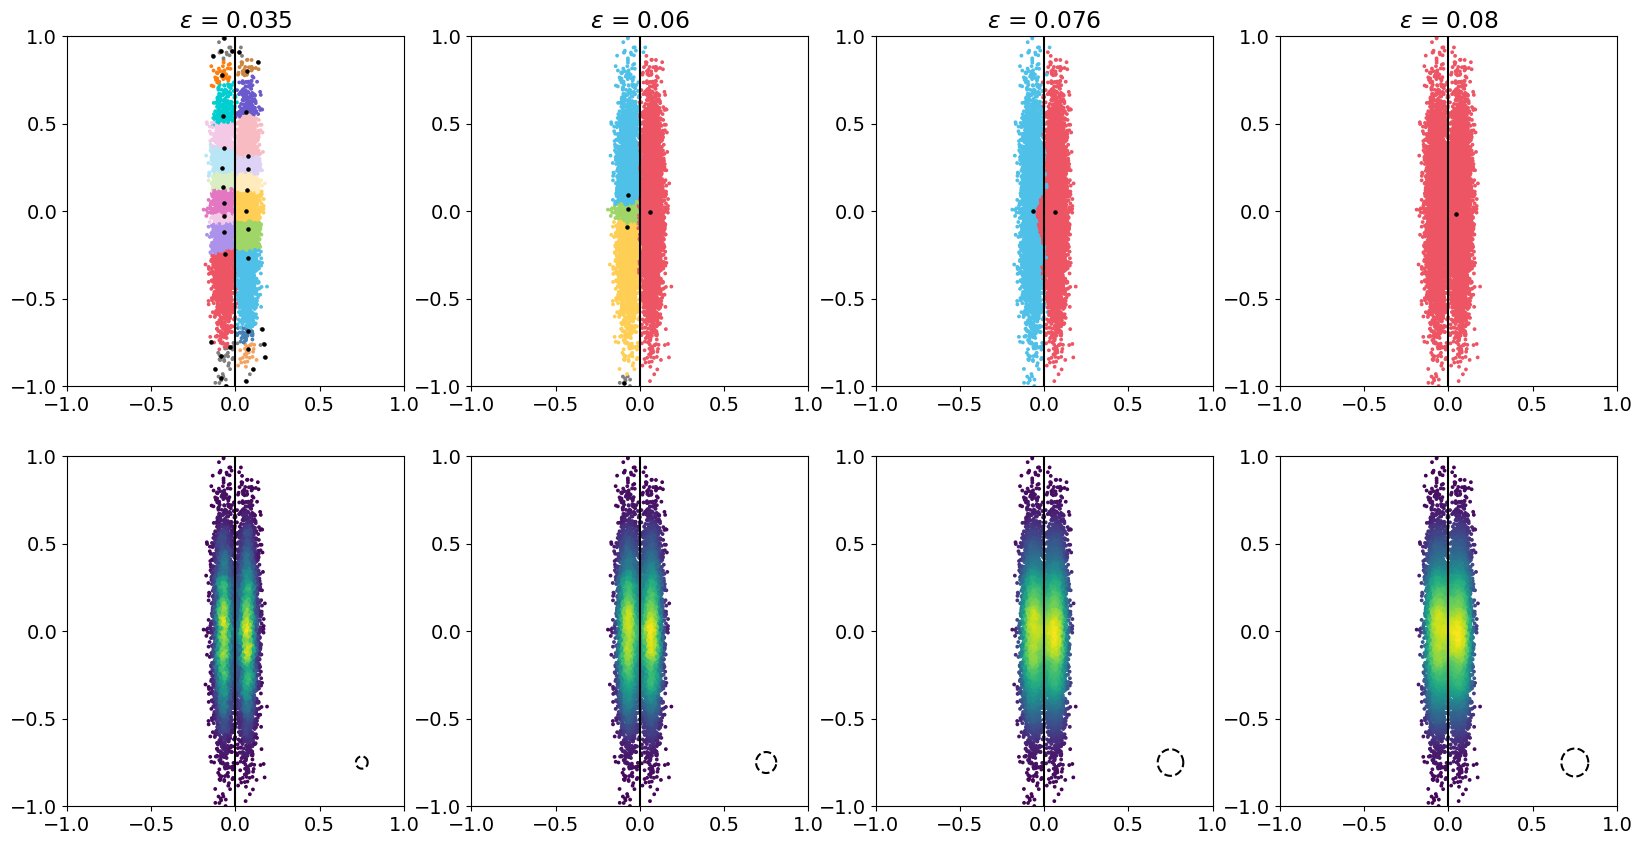

In [10]:
fig, axs = plt.subplots(2,4,figsize = [20,10])

for i,r in enumerate([.035,.06, .076, .08]):
    maxshift.cluster(r, m = 1)
    clusters = maxshift.reindex_clusters(25)
    axs[0,i].scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin =0, vmax = 23)
    axs[0,i].set_title(r'$\epsilon$ = ' + str(r))
    axs[0,i].scatter(data[maxshift.modes,0], data[maxshift.modes,1], s =5, color = 'black')
    
    axs[1,i].scatter(data[:,0], data[:,1],  c = maxshift.graph.deg, s = 3, cmap = 'viridis')
    axs[1,i].plot(.75+r*np.cos(theta), -.75+r*np.sin(theta), color = 'black', linestyle = 'dashed')


for i in range(4):
    for j in range(2):
        axs[j,i].set_xlim(-1,1)
        axs[j,i].set_ylim(-1,1)
        axs[j,i].set_yticks(np.arange(-1,1.5,.5))
        if (j == 1) & (i == 4):
            continue
        else:
            for path in boundaries :
                axs[j,i].plot(path[:,0], path[:,1], color = 'black')

plt.savefig('plots/eps_parameters.png', format='png', dpi=300, bbox_inches='tight')